# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler

import matplotlib.pyplot as plt


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:24<00:00,  4.17s/it]


# Plot processed data

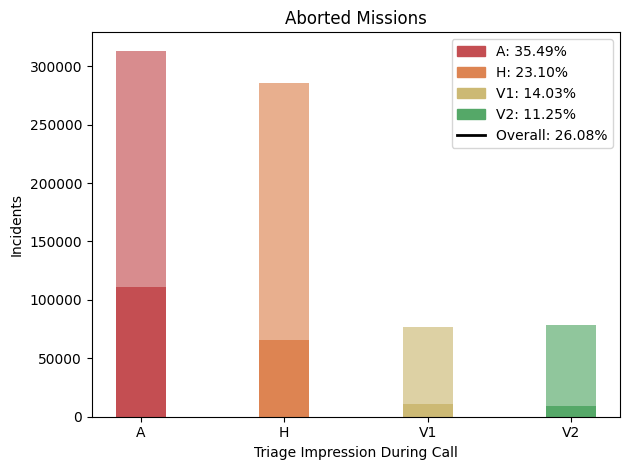

In [4]:
df = data_loader.processed_incidents_df

nan_counts = df[df["time_arrival_hospital"].isna()].groupby("triage_impression_during_call").size()
total_counts = df.groupby("triage_impression_during_call").size()
nan_percentages = (nan_counts / total_counts * 100).fillna(0)
overall_nan_percentage = df["time_arrival_hospital"].isna().mean() * 100
# set up the bar positions
bar_width = 0.35
index = range(len(total_counts))
# plot the bars using specific colors
fig, ax = plt.subplots()
ax: plt.Axes = ax

ax.bar(index, nan_counts, bar_width, color=[constants.COLOR_MAPPING_DEEP[cat] for cat in nan_counts.index])
ax.bar(index, total_counts, bar_width, color=constants.COLOR_MAPPING_LIGHT)
# label the bars
ax.set_xlabel("Triage Impression During Call")
ax.set_ylabel("Incidents")
ax.set_title("Aborted Missions")
ax.set_xticks(index)
ax.set_xticklabels(total_counts.index)
# create the percentage labels dynamically and match with colors
labels = []
handles = []
for cat, pct in nan_percentages.items():
    labels.append("{0}: {1:.2f}%".format(cat, pct))
    handles.append(plt.Rectangle((0, 0), 1, 1, color=constants.COLOR_MAPPING_DEEP[cat]))
labels.append("Overall: {0:.2f}%".format(overall_nan_percentage))
handles.append(plt.Line2D([0], [0], color="black", lw=2))

ax.legend(handles, labels)

plt.tight_layout()
plt.show()

# Plot enhanced data

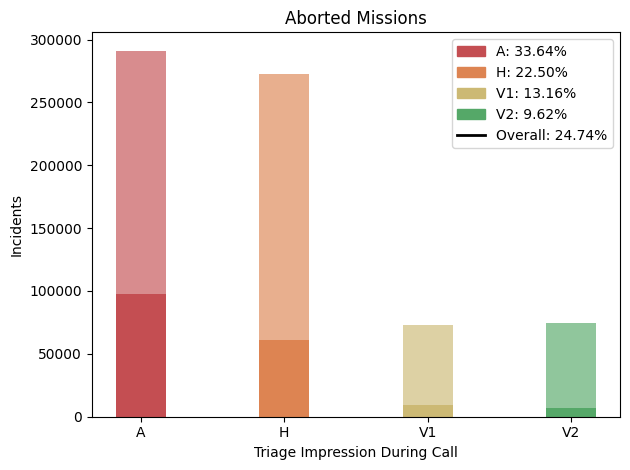

In [5]:
df = data_loader.enhanced_incidents_df

nan_counts = df[df["time_arrival_hospital"].isna()].groupby("triage_impression_during_call").size()
total_counts = df.groupby("triage_impression_during_call").size()
nan_percentages = (nan_counts / total_counts * 100).fillna(0)
overall_nan_percentage = df["time_arrival_hospital"].isna().mean() * 100
# set up the bar positions
bar_width = 0.35
index = range(len(total_counts))
# plot the bars using specific colors
fig, ax = plt.subplots()
ax: plt.Axes = ax

ax.bar(index, nan_counts, bar_width, color=[constants.COLOR_MAPPING_DEEP[cat] for cat in nan_counts.index])
ax.bar(index, total_counts, bar_width, color=constants.COLOR_MAPPING_LIGHT)
# label the bars
ax.set_xlabel("Triage Impression During Call")
ax.set_ylabel("Incidents")
ax.set_title("Aborted Missions")
ax.set_xticks(index)
ax.set_xticklabels(total_counts.index)
# create the percentage labels dynamically and match with colors
labels = []
handles = []
for cat, pct in nan_percentages.items():
    labels.append("{0}: {1:.2f}%".format(cat, pct))
    handles.append(plt.Rectangle((0, 0), 1, 1, color=constants.COLOR_MAPPING_DEEP[cat]))
labels.append("Overall: {0:.2f}%".format(overall_nan_percentage))
handles.append(plt.Line2D([0], [0], color="black", lw=2))

ax.legend(handles, labels)

plt.tight_layout()
plt.show()